## Importing Library

In [ ]:

import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array,load_img
import re
import pdf2image
from pytesseract import image_to_string,image_to_data
import pandas as pd
from pdf2image import convert_from_path
from PIL import Image
from pytesseract import Output
from matplotlib.patches import Rectangle

## Importing test data and convereting pdf file to jpeg image

In [ ]:

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

test=pd.read_csv('/content/Test.csv')
for i in range(131,201):
  pages = convert_from_path('/content/TE_'+str(i)+'.pdf')
  for page in pages:
    page.save('/content/TE_'+str(i)+'jpg', 'JPEG')


In [13]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


NameError: name 'pytesseract' is not defined

## Image preprocessing for better pytesseract accuracy

In [14]:

def image_preprocessing(path):
#   pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
  img = cv2.imread(path,0)
  img = cv2.medianBlur(img,5)

  ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
  th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

  titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
  images = [img, th1, th2, th3]

  for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
  new_image=images[3]
  return new_image

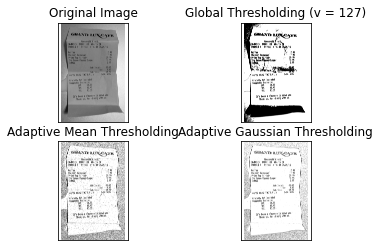

In [42]:
new_image=image_preprocessing('Train/TR_2.jpg')   #Example for showing how the image is being transfrormed for better results
# 
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

img=pytesseract.image_to_string(new_image)


In [37]:
print(img)

-O480. TABLE 101 "party 3
STEPHEN’ R . SvrCki -4 16:43. 04/25/15

2.95
17.95
25,95
43.95

2.95

‘Sub Total: 63:75
Tax 5. 50

~ Sub, Total: - 69.25
6S 225.

04/25 17342 TOTAL: 2

‘gratuity Not incltided

Suggested Gratuity:
20% “43.85

18% «12.47
15%. «10. 39:

‘to serve’ “you.

‘It's: ‘been’ a. pleasure
with: us,

Thank you for. dining

 



## Setting 400 dpi

In [44]:

for i in range(1,191):
  im = Image.open('./Train/TR_'+str(i)+'.jpg')
#   im = Image.open('/Test/TE_'+str(i)+'.j pg')
  im.save('Train/TR_'+str(i)+'jpg.jpeg',dpi=(400,400))
# 'Train/Tr_2.jpg'

C:\Users\Himanshu\anaconda3\envs\tf1\lib\site-packages\PIL\Image.py:2800: DecompressionBombWarning: Image size (94080000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


## Extracting text from data

In [47]:
from PIL import Image
from matplotlib import pyplot
from pytesseract import image_to_string
from keras.preprocessing.image import load_img
l_test=[]
for i in range(1,191):
  custom_config = r'-c tessedit_char_whitelist=subtotalSUBTOTAL$0123456789.: --psm 6'
  image=load_img('./Train/TR_'+str(i)+'jpg.jpeg')
  text=image_to_string(image,config=custom_config)
  l_test.append(text)
l_test


['lllT\na 4\nSut as\nL as\n5305AOAST\nLooBa.A90804\nS625970906\n7 S:as Statto:3\nOa:6993\nlabla:Bll Busts:2\n1ott 3.00\nLu 45.90\n1o 3.00\nSUBTOTAL: 51.90\nTa1: 4.68\n5262016 12:53:10\nTAOU\n\x0c',
 'to a\n: at\nsta\na ott ao a\noaSS .\na aTaa1\nSoaSSt\nat\nBS\n.: 7\noUta\nOaas.ts Laat\n: sSot6Saas\n3S : :\naaa tt STA Bs oa\nat oTSSoaaa .\n\x0c',
 '. s St\nT . tat\na bas\nTT\na aaa:\nl ala uaa\n$ S Bao ot 9 AL\nUoo: UB\na a aos. sao a3 tal\nSUTttttt 2\n: a\nA00Ball017314 :s2 a\n230 lato a o : ts\nalO.Taos. . S\n.TS a\n9172016 So o8Sb\nO378752 asa:A ao. 42. a\n1o oBo 4.9 . Sa\noSoua 0.00 A . : a .\noaos 0.00 A 7 o a\n1aOa sb2 1.99 t\n: . . sa t :\nSubTotal 6.98 a o 18\nTa 0 . ts s s oOa\nTotal 1615 oS\nULS\na sa 7.61 S 4 4\na At:2976 . as\n: Aoal :571883 . oS S S :\n: 8 : : Boa oa\nual : :\na lll a t 5 .\nTaou To st BS 1 . 7 S\n2 o a Tl\na 4\nbs a t\nbat o 2\na 4\n: o :\n2a\na\n1S 9 5\nBOLOAOTAS\nt\n\x0c',
 'aalata\n\n10325aoosBl\n\nla.L33176\n\n3053866638\nS:aa Stato:10\nO :8262 a 1\n:

## Filling the empty sequences

In [48]:


k=[]
for i in range(len(l_test)):
  if l_test[i]=='':
    filename='./Train/TR_'+str(131+i)+'jpg.jpeg'
    image=image_preprocessing(filename)           #Using image_preprocessing function to remove background noise resulting in better pytesseract accuracy
    l_test[i]=image_to_string(image)
    k.append(l_test[i])
l_test


['lllT\na 4\nSut as\nL as\n5305AOAST\nLooBa.A90804\nS625970906\n7 S:as Statto:3\nOa:6993\nlabla:Bll Busts:2\n1ott 3.00\nLu 45.90\n1o 3.00\nSUBTOTAL: 51.90\nTa1: 4.68\n5262016 12:53:10\nTAOU\n\x0c',
 'to a\n: at\nsta\na ott ao a\noaSS .\na aTaa1\nSoaSSt\nat\nBS\n.: 7\noUta\nOaas.ts Laat\n: sSot6Saas\n3S : :\naaa tt STA Bs oa\nat oTSSoaaa .\n\x0c',
 '. s St\nT . tat\na bas\nTT\na aaa:\nl ala uaa\n$ S Bao ot 9 AL\nUoo: UB\na a aos. sao a3 tal\nSUTttttt 2\n: a\nA00Ball017314 :s2 a\n230 lato a o : ts\nalO.Taos. . S\n.TS a\n9172016 So o8Sb\nO378752 asa:A ao. 42. a\n1o oBo 4.9 . Sa\noSoua 0.00 A . : a .\noaos 0.00 A 7 o a\n1aOa sb2 1.99 t\n: . . sa t :\nSubTotal 6.98 a o 18\nTa 0 . ts s s oOa\nTotal 1615 oS\nULS\na sa 7.61 S 4 4\na At:2976 . as\n: Aoal :571883 . oS S S :\n: 8 : : Boa oa\nual : :\na lll a t 5 .\nTaou To st BS 1 . 7 S\n2 o a Tl\na 4\nbs a t\nbat o 2\na 4\n: o :\n2a\na\n1S 9 5\nBOLOAOTAS\nt\n\x0c',
 'aalata\n\n10325aoosBl\n\nla.L33176\n\n3053866638\nS:aa Stato:10\nO :8262 a 1\n:

## Searching terms like total,subtotal and amount that may contain the total amount

In [49]:


k=[]
for i in l_test:
  k.append(i.split('\n'))
k
for i in k:
  j=0
  while j<len(i):
      result1=re.search(r"subtotal", i[j].lower())
      result2=re.search(r"total", i[j].lower())
      result3=re.search(r"amount", i[j].lower())
      result4=re.search(r"cash", i[j].lower())
      if result1==None and result2==None and result3==None:
        i.pop(j)
      else:
        j=j+1
k
final=[]
for i in range(len(k)):
  for_this=[]
  for j in range(len(k[i])):
    result=re.findall("\d+\.\d+",k[i][j])     #This searches all the floating values in the string containg total,subtotal and amount 
    if len(result)>0:
      for_this.append(float(result[0]))
  if len(for_this)==0:
    final.append(0)
  else:
    final.append(max(for_this))               #Appending the maximum float value present for each image since total amount is the sum of prices of all the items
final
for i in range(len(final)):
  if final[i]==0:
    final[i]=sum(final)/len(final)
final


[51.9,
 4424.7257947368425,
 6.98,
 4448.013825235457,
 5.03,
 4471.424424315644,
 93.58,
 143.71,
 24.47,
 4494.9582370752005,
 71.4,
 64.43,
 33.26,
 4518.615912007175,
 4542.3981010177395,
 50.29,
 323.7,
 11.04,
 4566.305459444147,
 43.0,
 35.95,
 4590.338646072802,
 29.88,
 30.15,
 33.92,
 6.64,
 4614.498323157395,
 42.75,
 4638.785156437171,
 30.9,
 4663.199815155262,
 44.35,
 4687.7429720771315,
 46.73,
 4712.415303509115,
 26.38,
 52.76,
 164.89,
 4737.217489317059,
 13.05,
 28.04,
 4762.150212945043,
 69.9,
 4787.214161434227,
 4812.410025441775,
 4837.73849925989,
 36.86,
 4863.200280834942,
 91.45,
 4888.7960717867045,
 25.22,
 10.0,
 4914.526577427688,
 23.5,
 4940.392506782569,
 4966.394572607742,
 4992.53349141094,
 9.58,
 5018.809983470998,
 7.55,
 83.5,
 26.37,
 5045.224772857687,
 5071.778587451675,
 5098.472158964579,
 45.79,
 5125.306222959129,
 5152.28151886944,
 5179.398790021384,
 10.9,
 5206.658783653076,
 5234.062250935461,
 5261.609946993015,
 13.22,
 31.16,
 1

## Writing predictions

In [57]:

test=pd.read_csv("Test.csv")
import csv
with open('predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['FileName','Total Amount'])
    for i in range(len(list(final))):
        writer.writerow([test["FileName"][i],final[i]])